In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [4]:
device = "/GPU:0" if tf.config.list_physical_devices('GPU') else "/CPU:0"

In [5]:
device

'/GPU:0'

In [6]:
with tf.device(device):
  model = Sequential([


    Conv2D(64, (3, 3), activation='relu', input_shape = (28,28,1), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),

    Flatten(),
    Dense(512, activation= 'relu'),
    Dropout(0.5),
    Dense(256, activation= 'relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
  ])

  model.summary()
  model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss= CategoricalCrossentropy(),
    metrics=['accuracy']
  )


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,926,602 (26.42 MB)

 Trainable params: 6,926,602 (26.42 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
with tf.device(device):
  history = model.fit(
      x_train, y_train,
      validation_split=0.2,
      epochs=10,
      batch_size=64,
      verbose=1
  )

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7198 - loss: 0.7616 - val_accuracy: 0.8744 - val_loss: 0.3349
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8885 - loss: 0.3162 - val_accuracy: 0.9052 - val_loss: 0.2517
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9091 - loss: 0.2543 - val_accuracy: 0.9143 - val_loss: 0.2351
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9196 - loss: 0.2169 - val_accuracy: 0.9184 - val_loss: 0.2200
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9304 - loss: 0.1898 - val_accuracy: 0.9195 - val_loss: 0.2297
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9376 - loss: 0.1690 - val_accuracy: 0.9245 - val_loss: 0.2215
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9455 - loss: 0.1494 - val_accuracy: 0.9204 - val_loss: 0.2204
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9525 - loss: 0.1258 - val_accurac

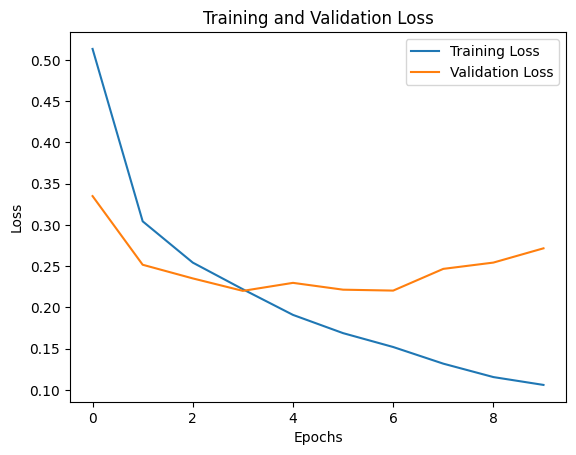

In [8]:
plt.plot(history.history['loss'], label='Training Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


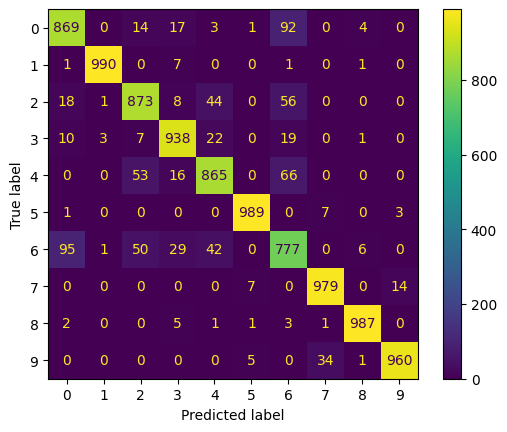

In [9]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,1)
y_test = np.argmax(y_test, 1)
cm = confusion_matrix(y_test, y_pred)
cd = ConfusionMatrixDisplay(cm,display_labels= np.arange(10))
cd.plot()


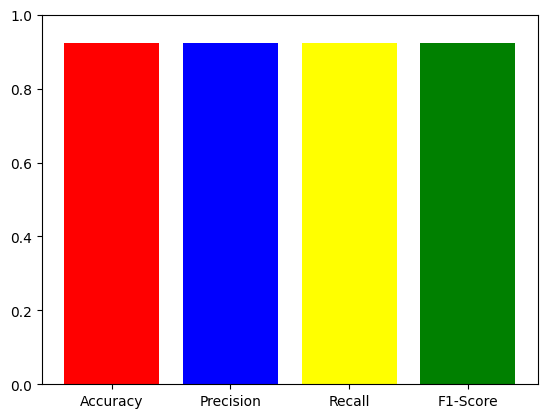

In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred, average = 'macro')
plt.bar(["Accuracy", "Precision", "Recall", "F1-Score"], [accuracy,precision,recall,f1], color = ['red','blue','yellow', 'green'])
plt.ylim(0,1)
plt.show()

In [12]:
print(cm)
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1-Score: ', f1 )

[[869   0  14  17   3   1  92   0   4   0]
 [  1 990   0   7   0   0   1   0   1   0]
 [ 18   1 873   8  44   0  56   0   0   0]
 [ 10   3   7 938  22   0  19   0   1   0]
 [  0   0  53  16 865   0  66   0   0   0]
 [  1   0   0   0   0 989   0   7   0   3]
 [ 95   1  50  29  42   0 777   0   6   0]
 [  0   0   0   0   0   7   0 979   0  14]
 [  2   0   0   5   1   1   3   1 987   0]
 [  0   0   0   0   0   5   0  34   1 960]]
Accuracy:  0.9227
Precision:  0.9228840633185855
Recall:  0.9227000000000001
F1-Score:  0.9227423532068977
